In [1]:
! pip3 install numpy
! pip3 install matplotlib
! pip3 install sklearn
! pip3 install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.

In [7]:
np.random.seed(42)

def EuclideanDistanceCal(xi, xj):
    return np.sqrt(np.sum((xi - xj)**2))

def squaredDeviation(xi, mean):
    return np.sum((xi - mean)**2)

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # List of samples for each cluster
        self.clusters = [[] for _ in range(self.K)] # Contain index of each data point.
        self.centroids = [] # Contain coordiante of centroid points
        
        # inertia
        self.inertia_ = 0
        
    def _initCenters(self):
        pass

    def _closestCentroid(self, sample, centroids):
        #  Calculate distance of the current sample to each centroid
        distances = []
        for centroid in centroids:
            distance = EuclideanDistanceCal(sample, centroid)
            distances.append(distance)
        #  Find the labels that make minimum distance
        return np.argmin(distances)

    def _createClusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idxSample, sample in enumerate(self.X):
            idxCentroid = self._closestCentroid(sample, centroids)
            clusters[idxCentroid].append(idxSample)
        return clusters
        
    def _getClusterLabels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)        
        for idxCluster, cluster in enumerate(clusters):
            for idxSample in cluster:
                labels[idxSample] = idxCluster
        return labels
    
    def _getCentroids(self, clusters):
        # Assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for idxCluster, cluster in enumerate(clusters):
            meanClusterValue = np.mean(self.X[cluster], axis=0)
            centroids[idxCluster] = meanClusterValue
        return centroids
    
    def _calcInertia(self):
        wcss = []
        for idxCluster, cluster  in enumerate(self.clusters):
            centroid = self.centroids[idxCluster]
            subsetData  = self.clusters[idxCluster]
            for idxData in subsetData:
                point = self.X[idxData]
                wcss.append(squaredDeviation(point, centroid))
        return sum(wcss)    
    
    def _isConverged(self, prevCentroids, currCentroids):
        # Distances between each old and new centroids, fol all centroids
        distances = []
        for idx in range(self.K):
            distance = EuclideanDistanceCal(prevCentroids[idx], currCentroids[idx])
            distances.append(distance)
        return sum(distances) == 0
    
    def visualize(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # STEP 1: Initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]        
        # self._initCenters() # TODO Ở ĐÂY NÈ BẠN, XOÁ 2 DÒNG TRÊN ĐI
        
        # STEP 2: Clustering 
        for _ in range(self.max_iters):
            # Assigning samples to the closest centroids 
            self.clusters = self._createClusters(self.centroids)
            # if self.plot_steps:
            #     self.visualize()
            
            # Calculate new centroids from clusters
            prevCentroids = self.centroids
            self.centroids = self._getCentroids(self.clusters)
            
            # Update inertia_
            self.inertia_ = self._calcInertia()
            
            # If clusters have changed -> repeated, if not -> break
            if self._isConverged(prevCentroids=prevCentroids, currCentroids=self.centroids):
                break
            # if self.plot_steps:
            #     self.visualize()
        # Classify samples as the index of their clusters
        return self._getClusterLabels(self.clusters)

In [9]:
# X, y = make_blobs(
#     centers=10, n_samples=500, n_features=2, shuffle=True, random_state=40
# )

# clusters = len(np.unique(y)) + 
# wcss = []
# # figure, axis = plt.subplots(clusters/3 + clusters % 3, 3)
# for num in range(1, clusters + 10):
#     k = Kmeans.KMeans(K=num, max_iters=150, plot_steps=True)    
#     y_pred = k.predict(X)
#     wcss.append(k.inertia_)
#     k.visualize()    
# plt.plot(range(1, clusters + 10), wcss)
# plt.title('The elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [15]:
df = pd.read_csv("./sp500_stocks.csv")
print(len((df[df.isnull().any(axis=1)]).index))
df = df.dropna()
print(df)

70725
               Date Symbol   Adj Close       Close        High         Low  \
1        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
2        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
3        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
4        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
5        2010-01-08    MMM   60.247749   84.320000   84.320000   83.300003   
...             ...    ...         ...         ...         ...         ...   
1575499  2022-05-18    ZTS  158.860001  158.860001  165.199997  158.100006   
1575500  2022-05-19    ZTS  158.630005  158.630005  160.350006  156.669998   
1575501  2022-05-20    ZTS  162.559998  162.559998  162.809998  159.009995   
1575502  2022-05-23    ZTS  163.000000  163.000000  164.850006  162.350006   
1575503  2022-05-24    ZTS  163.050003  163.050003  163.869995  161.320007   

               Open     Volume  
1         83.089996  304

In [17]:
stock_close = df[['Symbol','Close']]
stock_open = df[['Symbol','Open']]
print(stock_close)
print(stock_open)

        Symbol       Close
1          MMM   83.019997
2          MMM   82.500000
3          MMM   83.669998
4          MMM   83.730003
5          MMM   84.320000
...        ...         ...
1575499    ZTS  158.860001
1575500    ZTS  158.630005
1575501    ZTS  162.559998
1575502    ZTS  163.000000
1575503    ZTS  163.050003

[1504779 rows x 2 columns]
        Symbol        Open
1          MMM   83.089996
2          MMM   82.800003
3          MMM   83.879997
4          MMM   83.320000
5          MMM   83.690002
...        ...         ...
1575499    ZTS  164.800003
1575500    ZTS  158.139999
1575501    ZTS  161.610001
1575502    ZTS  163.710007
1575503    ZTS  162.880005

[1504779 rows x 2 columns]


In [23]:
movements = stock_close['Close'].iloc[:] - stock_open['Open'].iloc[:]
print(movements)

1         -0.070000
2         -0.300003
3         -0.209999
4          0.410004
5          0.629997
             ...   
1575499   -5.940002
1575500    0.490005
1575501    0.949997
1575502   -0.710007
1575503    0.169998
Length: 1504779, dtype: float64
<class 'pandas.core.series.Series'>


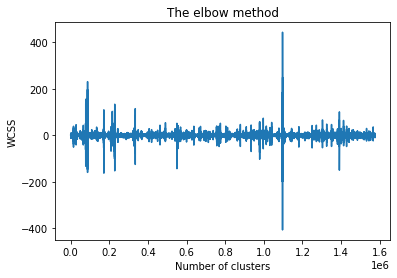

In [25]:
plt.plot(movements)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()